In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
from google.colab import files
import zipfile
import os

# Upload the dataset zip
uploaded = files.upload()

# Example: if your uploaded file is "cat_dog_dataset.zip"
with zipfile.ZipFile("training_set.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Now check the path
os.listdir("/content/dataset")


Saving training_set.zip to training_set.zip


['training_set']

In [5]:
training_set = datagen.flow_from_directory(
    '/content/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
r=cnn.fit(x = training_set, epochs = 3)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 141ms/step - accuracy: 0.6176 - loss: 0.8140
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.6523 - loss: 0.7564
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.6682 - loss: 0.7190


In [21]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [31]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/dataset/training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image1 = image.img_to_array(test_image)
test_image1=test_image1/255
test_image1 = np.expand_dims(test_image1, axis = 0)
result = cnn.predict(test_image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


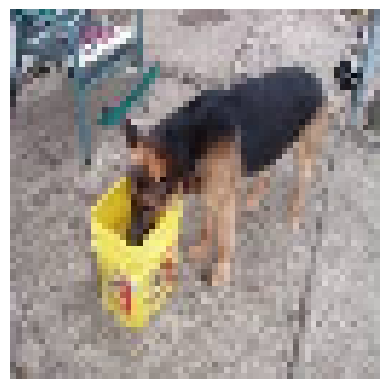

The image classified is dog


In [32]:
plt.imshow(test_image)
plt.axis("off")
plt.show()
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")